In [1]:
import pandas as pd
from datetime import datetime

from pmdarima.arima.utils import ndiffs, nsdiffs
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

In [2]:
path = f"/masters_diploma/processed_data/history_weather_with_daylight.csv"

full_set = pd.read_csv(
    path,
    parse_dates=["date"],
    index_col=["date"],
)

In [3]:
full_set

,temperature,relative_humidity,dew_point,precipitation,rain,snowfall,weather_code,pressure_msl,surface_pressure,cloud_cover,...,sunshine_duration_mean_3_years,sunshine_duration_max_4_years,sunshine_duration_min_4_years,sunshine_duration_mean_4_years,sunshine_duration_lag_24,sunshine_duration_lag_48,sunshine_duration_lag_72,sunshine_duration_lag_168,daylight_seconds,dark_seconds
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,-5.9,56.0,-13.3,0.0,0.0,0.07,71.0,1026.1,1001.8,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 01:00:00,-5.5,59.0,-12.4,0.0,0.0,0.00,3.0,1025.1,1000.8,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 02:00:00,-5.2,63.0,-11.2,0.0,0.0,0.00,3.0,1024.7,1000.5,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 03:00:00,-4.9,68.0,-9.9,0.0,0.0,0.00,3.0,1024.3,1000.1,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2015-01-01 04:00:00,-4.6,73.0,-8.7,0.0,0.0,0.07,71.0,1024.1,1000.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-25 19:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2025-09-25 20:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600
2025-09-25 21:00:00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3600


In [76]:
# target = full_set['temperature']
# exog = full_set[['month', 'week_day', 'year_day', 'is_day', 'daylight_seconds', 
#                  'temperature_mean_3_weeks', 'temperature_mean_3_years'
#                 ]]

target = full_set['surface_pressure']
exog = full_set[['month', 'year_day', 'daylight_seconds', 'surface_pressure_mean_3_weeks', 'pressure_msl_mean_3_weeks'
#                  'relative_humidity_lag_72', 'relative_humidity_mean_3_days', 
#                  , 'pressure_msl_max_5_days', 'pressure_msl_min_5_days' 
#                  , 'pressure_msl_mean_5_days', 'surface_pressure_lag_72'
#                  , 'wind_speed_mean_3_days', 'wind_direction_max_5_days'
                ]]


target = full_set['wind_direction']
exog = full_set[['month', 'year_day', 'wind_direction_lag_72', 'wind_direction_max_3_days',
                 'wind_direction_mean_3_days']]


target = full_set['cloud_cover']
exog = full_set[['month', 'year_day', 'cloud_cover_lag_72', 'daylight_seconds',
                 'wind_direction_mean_3_days']]

target = full_set['wind_speed']
exog = full_set[['month', 'year_day', 'wind_speed_lag_72', 'wind_speed_mean_5_days',
                 'wind_speed_mean_3_days']]

target = full_set['relative_humidity']
exog = full_set[['month', 'year_day', 'surface_pressure_lag_72', 'wind_speed_mean_3_days', 'daylight_seconds',
                 'relative_humidity_mean_3_days', 'temperature_max_5_days', 'surface_pressure_mean_3_days']]



target = target.asfreq(pd.infer_freq(target.index) or "H")
exog = exog.reindex(target.index).interpolate(limit_direction="both")

In [46]:
train_start = datetime(2023, 9, 1, 0)
train_end = datetime(2025, 9, 11, 23)
test_start = datetime(2025, 9, 12, 0)
test_end = datetime(2025, 9, 14, 23)

In [77]:
X_train = exog.loc[train_start: train_end]
X_test = exog.loc[test_start: test_end]

y_train = target.loc[train_start: train_end]
y_test = target.loc[test_start: test_end]

In [68]:
# d = ndiffs(temp, alpha=0.05, test='kpss')
# D = nsdiffs(temp, m=24, max_D=1, test='ocsb') 

# d, D

In [69]:
# model_arima = ARIMA(y_train, order=(2, 1, 3))
# result_arima = model_arima.fit()

# ar_forecast = result_arima.forecast(steps=len(y_test))

In [78]:
model_sarimax = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 0, 1, 24))
result_sarimax = model_sarimax.fit(disp=False)

sar_forecast = result_sarimax.get_forecast(steps=len(y_test), exog=X_test).predicted_mean

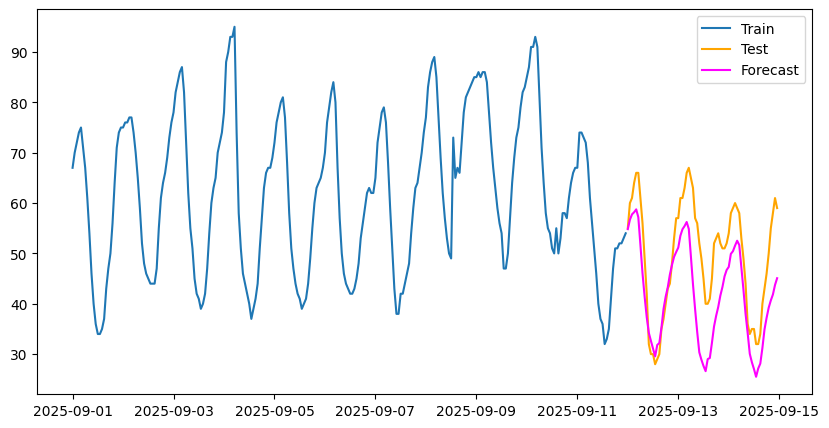

In [79]:
plt.figure(figsize=(10,5))
plt.plot(y_train.loc['2025-09-01':], label="Train")
plt.plot(y_test, label="Test", color="orange")
# plt.plot(ar_forecast, label="Forecast", color="red")
plt.plot(sar_forecast, label="Forecast", color="magenta")
plt.legend()
plt.show()

In [11]:
# subset = pd.concat([
#     full_set.loc["2024-01-01":"2024-01-01 23:00", ["is_day", "sunshine_duration"]],
#     full_set.loc["2025-01-01":"2025-01-01 23:00", ["is_day", "sunshine_duration"]]
# ])
# subset

In [62]:
_ = round(pd.concat([y_test, sar_forecast], axis=1))
_['diff'] = round(_['temperature'] - _['predicted_mean'], 2)
_['rel_err'] = round(_['predicted_mean']/_['temperature'] - 1, 2)*100

_.iloc[24:48]

,temperature,predicted_mean,diff,rel_err
2025-09-13 00:00:00,17.0,15.0,2.0,-12.0
2025-09-13 01:00:00,16.0,14.0,2.0,-12.0
2025-09-13 02:00:00,16.0,14.0,2.0,-12.0
2025-09-13 03:00:00,15.0,14.0,1.0,-7.0
2025-09-13 04:00:00,15.0,14.0,1.0,-7.0
2025-09-13 05:00:00,15.0,14.0,1.0,-7.0
2025-09-13 06:00:00,16.0,15.0,1.0,-6.0
2025-09-13 07:00:00,16.0,17.0,-1.0,6.0
2025-09-13 08:00:00,18.0,18.0,0.0,0.0
2025-09-13 09:00:00,19.0,19.0,0.0,0.0


In [17]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [80]:
x_model = XGBRegressor(**{'booster': 'gbtree', 'colsample_bytree': 1, 'eta': 0.3, 'eval_metric': 'rmse', 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'n_jobs': -1, 'objective': 'reg:squarederror', 'random_state': 2, 'subsample': 1})
r_model = RandomForestRegressor(**{'max_depth': 6, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 2})

In [81]:
x_y = pd.DataFrame(x_model.fit(X_train, y_train).predict(X_test), index=y_test.index)
r_y = pd.DataFrame(r_model.fit(X_train, y_train).predict(X_test), index=y_test.index)

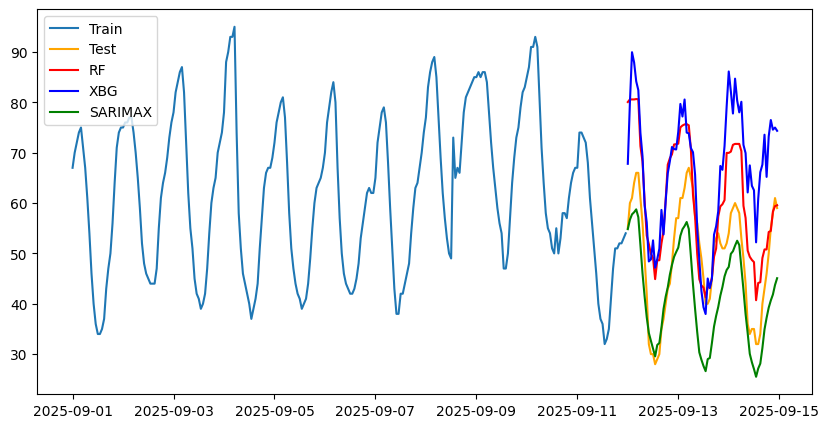

In [82]:
plt.figure(figsize=(10,5))
plt.plot(y_train.loc['2025-09-01':], label="Train")
plt.plot(y_test, label="Test", color="orange")
plt.plot(r_y, label="RF", color="red")
plt.plot(x_y, label="XBG", color="blue")
plt.plot(sar_forecast, label="SARIMAX", color="green")
plt.legend()
plt.show()

In [59]:
_ = round(pd.concat([y_test, sar_forecast, r_y, x_y], axis=1))
# _['diff'] = round(_['temperature'] - _['predicted_mean'], 2)
# _['rel_err'] = round(_['predicted_mean']/_['temperature'] - 1, 2)*100

_.iloc[24:48]

,temperature,predicted_mean,0,0
2025-09-13 00:00:00,17.0,15.0,16.0,16.0
2025-09-13 01:00:00,16.0,14.0,16.0,16.0
2025-09-13 02:00:00,16.0,14.0,16.0,16.0
2025-09-13 03:00:00,15.0,14.0,16.0,16.0
2025-09-13 04:00:00,15.0,14.0,16.0,15.0
2025-09-13 05:00:00,15.0,14.0,17.0,15.0
2025-09-13 06:00:00,16.0,15.0,17.0,16.0
2025-09-13 07:00:00,16.0,17.0,18.0,18.0
2025-09-13 08:00:00,18.0,18.0,21.0,20.0
2025-09-13 09:00:00,19.0,19.0,21.0,21.0


In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [14]:
# ====== Load and prepare data ======
path = "/masters_diploma/processed_data/history_weather_with_daylight.csv"

full_set = pd.read_csv(
    path,
    parse_dates=["date"],
    index_col="date"
)

# Target and features
y = full_set["temperature"]
X = full_set[[
    "month", "year_day", "is_day", 'week_day', "daylight_seconds"
    , "temperature_min_3_weeks", "temperature_max_3_weeks", "temperature_mean_3_weeks"
    , "temperature_min_3_years", "temperature_max_3_years", "temperature_mean_3_years"
#     , "cloud_cover_mean_7_days", "pressure_msl_mean_7_days"
]]

# Ensure frequency and fill missing values
X = X.asfreq("h").interpolate()
y = y.asfreq("h").interpolate()

# ====== Split into train/test ======
train_start = datetime(2023, 9, 1, 0)
train_end   = datetime(2025, 9, 11, 23)
test_start  = datetime(2025, 9, 12, 0)
test_end    = datetime(2025, 9, 14, 23)

X_train = X.loc[train_start:train_end]
y_train = y.loc[train_start:train_end]
X_test  = X.loc[test_start:test_end]
y_test  = y.loc[test_start:test_end]

# ====== Scale features ======
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ====== Build a simple neural net ======
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")

# ====== Train ======
model.fit(X_train_scaled, y_train, epochs=30, verbose=0)

# ====== Forecast the next 7 days (hourly) ======
y_pred = model.predict(X_test_scaled).flatten()

# ====== Compare results ======
result = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred, 
    "err": np.round(y_test.values - y_pred, 2)
}, index=y_test.index)

print(result)  # first 24 hours
print("MAE:", mean_absolute_error(y_test, y_pred))




3/3 [==============================] - 0s 3ms/step
                     Actual  Predicted   err
date                                        
2025-09-12 00:00:00    15.2  16.560114 -1.36
2025-09-12 01:00:00    14.2  16.776325 -2.58
2025-09-12 02:00:00    14.0  16.596720 -2.60
2025-09-12 03:00:00    13.4  16.399246 -3.00
2025-09-12 04:00:00    13.0  15.922237 -2.92
...                     ...        ...   ...
2025-09-14 19:00:00    16.7  17.165998 -0.47
2025-09-14 20:00:00    16.1  16.593218 -0.49
2025-09-14 21:00:00    15.4  16.359774 -0.96
2025-09-14 22:00:00    15.0  16.299459 -1.30
2025-09-14 23:00:00    14.9  16.203440 -1.30

[72 rows x 3 columns]
MAE: 1.7002278751797146


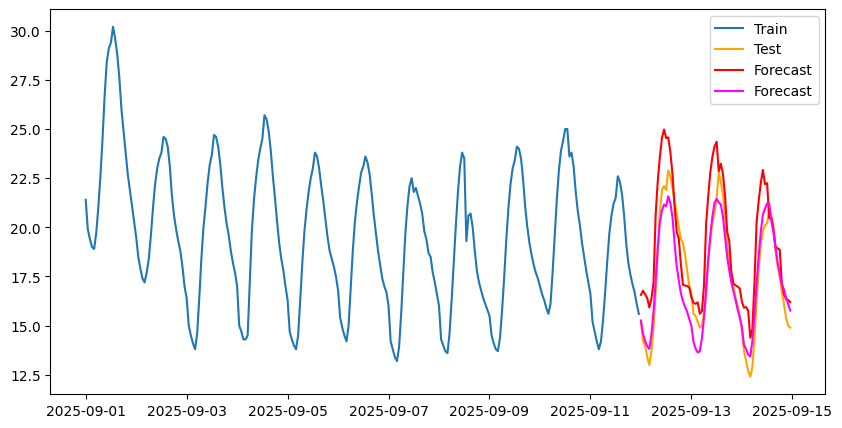

In [15]:
plt.figure(figsize=(10,5))
plt.plot(y_train.loc['2025-09-01':], label="Train")
plt.plot(y_test, label="Test", color="orange")
plt.plot(result["Predicted"], label="Forecast", color="red")
plt.plot(sar_forecast, label="Forecast", color="magenta")
plt.legend()
plt.show()

In [16]:
y_pred

array([16.560114, 16.776325, 16.59672 , 16.399246, 15.922237, 16.378887,
       17.20631 , 20.63337 , 22.340685, 23.580511, 24.551062, 24.976526,
       24.541464, 24.575352, 23.824718, 22.70958 , 21.086424, 19.770382,
       19.421412, 18.114294, 17.075182, 17.040745, 17.015844, 16.933031,
       16.453081, 16.159927, 16.113914, 16.181961, 15.609063, 15.735866,
       17.052174, 20.158957, 21.58563 , 22.810286, 23.590433, 24.11537 ,
       24.349916, 22.852377, 23.235237, 22.708391, 21.598104, 19.787012,
       19.30751 , 17.72325 , 17.134308, 17.053116, 16.983751, 16.887018,
       16.226355, 15.914776, 15.946208, 15.756022, 14.388816, 14.842582,
       17.21639 , 20.254143, 21.354193, 22.25284 , 22.917555, 22.197031,
       22.247118, 20.464075, 20.48482 , 19.878143, 19.016493, 18.92575 ,
       18.869   , 17.165998, 16.593218, 16.359774, 16.29946 , 16.20344 ],
      dtype=float32)